## Analysis of the current language situation in Morocco

In Morocco, being multilingual is the norm. Morocco has two official languages: Arabic and Berber. Though French is considered to be Morocco’s unofficial (but often debated) third language. In schools, children are taught mostly reading and writing in Standard Arabic and in Darija for speaking. Along with that, French is found as the preferred language of business and government affairs. Berber languages are typically used in more informal situations — such as at home.
On top of this, learning English for Moroccans, especially the youth, is growing in popularity (and is taught in schools).

### Importing libraries : 

In [6]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Dowloading the dataset :

In [7]:
data=pd.read_excel("Data.xlsx")
data.sample(7)

,Отметка времени,gender,age,city,Languages,Where do you speak Berber language?,Where do you speak Arabic(Darija)?,Where do you speak English?,Where do you speak French?,Where do you speak Spanish?,Where do you speak Italian?,Berber Writing,Berber Dialect
59,2020-09-15 11:50:50.691,Female,19,Casablanca,"Berber language, Arabic(Darija), French, English",home(family),"school/university, home(family), society(publi...",school/university,school/university,NaN,NaN,No,Tashlhit
71,2020-09-15 12:51:57.437,Female,21,Étudiante,"Berber language, Arabic(Darija), French, English","school/university, work place",home(family),school/university,school/university,NaN,NaN,Yes,Yes
92,2020-09-15 20:29:10.204,Female,20,imilchil,Berber language,"school/university, society(public places)",NaN,NaN,NaN,NaN,NaN,Yes,Tacashlhit
45,2020-09-13 14:14:01.604,Male,23,Agadir,"Berber language, Arabic(Darija), French","home(family), society(public places), work place","school/university, home(family), work place",NaN,school/university,NaN,NaN,No,Tashlhit-Tarifit
89,2020-09-15 17:49:21.605,Female,23,Casablanca,"Berber language, Arabic(Darija), French, English",home(family),"school/university, home(family), society(publi...","school/university, home(family), society(publi...","school/university, work place","school/university, society(public places)",work place,No,All the dialect
9,2020-09-05 22:03:39.866,Male,31,Kalaa des sraghna,"Arabic(Darija), French",I don’t speak it,"home(family), work place",With foreigners,society(public places),I don’t speak it,I don’t speak it,No,Darija
27,2020-09-07 01:31:42.491,Female,60,Agadir,"Berber language, Arabic(Darija)","home(family), society(public places)",society(public places),NaN,NaN,NaN,NaN,No,Tamazight


print("Dimension of the data set : ",data.shape)

In [8]:
### Summary of the data :
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Отметка времени                      103 non-null    datetime64[ns]
 1   gender                               103 non-null    object        
 2   age                                  103 non-null    int64         
 3   city                                 103 non-null    object        
 4   Languages                            103 non-null    object        
 5   Where do you speak Berber language?  75 non-null     object        
 6   Where do you speak Arabic(Darija)?   101 non-null    object        
 7   Where do you speak English?          79 non-null     object        
 8   Where do you speak French?           83 non-null     object        
 9   Where do you speak Spanish?          20 non-null     object        
 10  Where do you s

In [9]:
data.describe()

,age
count,103.000000
mean,24.009709
std,10.715112
min,8.000000
25%,20.000000
50%,21.000000
75%,23.000000
max,99.000000


### Data Cleaning :

In [10]:
data.isnull().sum()

Отметка времени                         0
gender                                  0
age                                     0
city                                    0
Languages                               0
Where do you speak Berber language?    28
Where do you speak Arabic(Darija)?      2
Where do you speak English?            24
Where do you speak French?             20
Where do you speak Spanish?            83
Where do you speak Italian?            87
Berber Writing                          8
Berber  Dialect                        28
dtype: int64

In [11]:
#Delete the first column :
data.drop(["Отметка времени"],axis=1,inplace=True)

In [12]:
data["city"].unique()

array(['Agadir ', 'Agadir', 'Fes ', 'Aachen', 'Ouarzazate', 'Morocco ',
       'Bénimellal', 'CASABLANCA', 'Kalaa des sraghna ', 'Berkane ',
       'Rabat, Morocco', 'agadir', 'Fes', 'Salé', ' Casablanca',
       'Casablanca', 'Rabat', 'Sale', 'Tangier', 'Taroudant ', 'Midelt',
       'Fez city ', 'Fez (Morocco) ', 'Youssoufia', 'Tiznit ',
       'Marrakech ', 'El houcima ', 'Casablanca ', 'Brest', 'AGADIR',
       'safi', 'Khemisset ', 'ZAGORA ', 'Khenifra', 'Had soualem', 'Safi',
       'Tinghir', 'Ouled teima', 'Meknes', 'Settat', 'Errachidia', 'SAFi',
       'Oujda', 'nador', 'Étudiante ', 'Morroco ', 'Marrakech', 'Belfaa',
       'OUARZAZATE', 'Alhoceima ', 'Sefrou', 'Ben Guerir', 'El jadida',
       'casablanca', 'tiznit', 'Casa blanca ', 'casablanca ',
       'El jadida ', 'imilchil', 'Salé ', 'Sidi bennour', 'NADOR', 'Fsz',
       'Morocco - Casablanca'], dtype=object)

In [13]:
data['city']=data['city'].apply(lambda x: x.lower()).str.replace(' ','')
data['city']=data['city'].replace('rabat,morocco','rabat')
data['city']=data['city'].replace('morocco-casablanca','casablanca')
data['city']=data['city'].replace('fez(morocco)','fes')
data['city']=data['city'].replace('fsz','fes')
data['city']=data['city'].replace('fezcity','fes')
data['city']=data['city'].replace('étudiante','morocco')
data['city']=data['city'].replace('morroco','morocco')

In [14]:
data["city"].value_counts().head()

casablanca    22
agadir        17
fes            6
rabat          5
safi           5
Name: city, dtype: int64

## Exploratory Data Analysis :

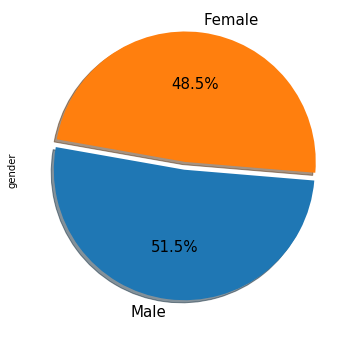

In [16]:
plt.figure(figsize=(6,6))
explode = (0, 0.06,)
data["gender"].value_counts().plot.pie( explode=explode,autopct='%1.1f%%', shadow=True, startangle=170,textprops={'fontsize': 15})
plt.show()

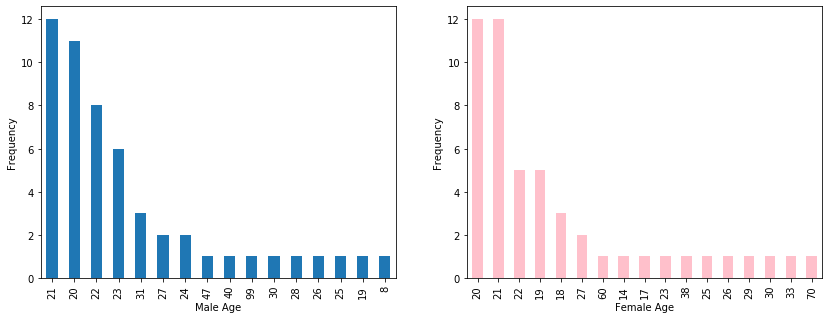

In [17]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
data[data["gender"]=="Male"]["age"].value_counts().plot.bar()
plt.xlabel("Male Age")
plt.ylabel("Frequency")
plt.subplot(1,2,2)
data[data["gender"]=="Female"]["age"].value_counts().plot.bar(color="pink")
plt.xlabel("Female Age")
plt.ylabel("Frequency")
plt.show()

In [18]:
data["Languages"].value_counts()

Berber language, Arabic(Darija), French, English                      30
Arabic(Darija), French, English                                       19
Arabic(Darija), French                                                11
Berber language, Arabic(Darija)                                        9
Berber language, Arabic(Darija), French                                6
Berber language, Arabic(Darija), English                               6
Arabic(Darija)                                                         4
Arabic(Darija), English                                                4
Berber language                                                        3
Arabic(Darija), French, English, german                                1
Berber language, Arabic(Darija), French, Spanish                       1
Arabic(Darija), French, English, Turkish (a little)                    1
Berber language,Arabic(Darija), English                                1
Arabic(Darija), French, English, allemande         

In [19]:
values=[[],[],[],[],[]]
Berber,Arabic,French,English,Spanish=values[0],values[1],values[2],values[3],values[4]
languages=["Berber language","Arabic(Darija)","French","English","spanish"]

for i in range(len(data["Languages"])):
    for j in range(len(languages)):
        if languages[j] in str(data["Languages"][i]):
            values[j].append("Yes")
        else : 
            values[j].append("No")

LanguagesDf=pd.DataFrame({'Berber': Berber, 
        'Arabic':Arabic, 
        'French':French,
        'English' :English,
        'Spanish':Spanish
        } )  
df1= pd.concat([LanguagesDf,data[["age","gender","city"]]], axis=1, join="inner")

In [20]:
df1.sample(5)

,Berber,Arabic,French,English,Spanish,age,gender,city
74,Yes,Yes,No,No,No,20,Male,agadir
4,No,Yes,Yes,Yes,No,22,Male,aachen
5,Yes,Yes,Yes,Yes,No,20,Male,ouarzazate
50,No,Yes,Yes,Yes,No,20,Male,khemisset
80,No,Yes,Yes,No,No,21,Female,casablanca


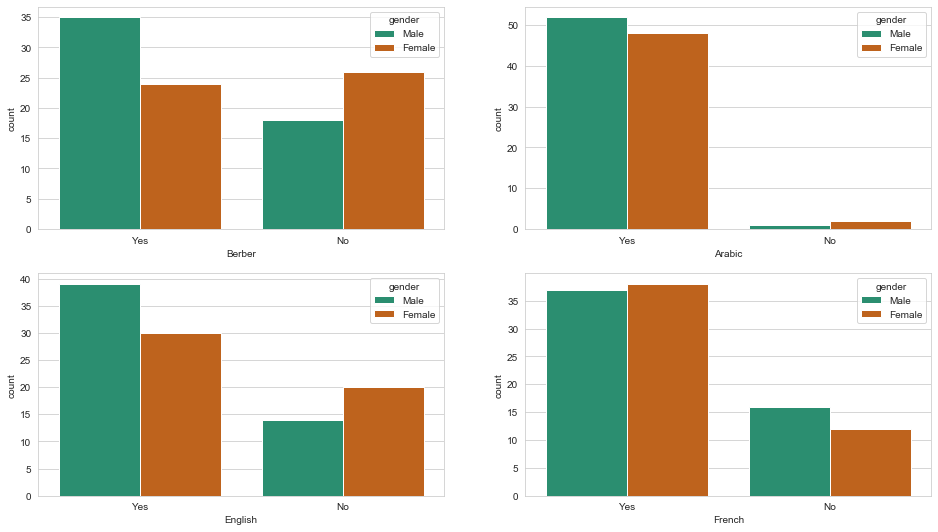

In [21]:
sns.set_style("whitegrid")
sns.set_palette("Dark2")
plt.figure(figsize=(16,9))
plt.subplot(2,2,1)
sns.countplot(x="Berber",hue="gender",data=df1)
plt.subplot(2,2,2)
sns.countplot(x="Arabic",hue="gender",data=df1)
plt.subplot(2,2,3)
sns.countplot(x="English",hue="gender",data=df1)
plt.subplot(2,2,4)
sns.countplot(x="French",hue="gender",data=df1)
plt.show()

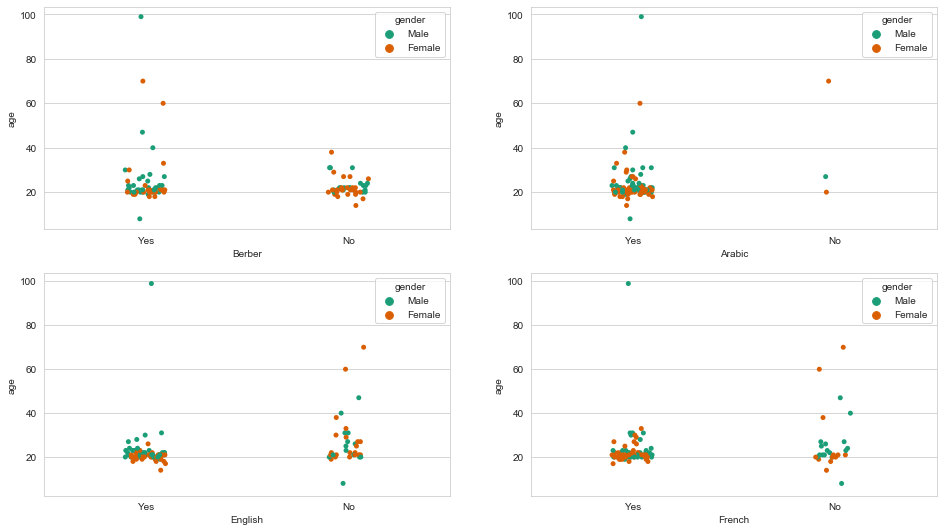

In [22]:
plt.figure(figsize=(16,9))
plt.subplot(2,2,1)
sns.stripplot(y="age",x="Berber",hue="gender",data=df1)
plt.subplot(2,2,2)
sns.stripplot(y="age",x="Arabic",hue="gender",data=df1)
plt.subplot(2,2,3)
sns.stripplot(y="age",x="English",hue="gender",data=df1)
plt.subplot(2,2,4)
sns.stripplot(y="age",x="French",hue="gender",data=df1)
plt.show()

#### Berber Language :

In [23]:

values=[[],[],[],[],[]]
school,home,society,workplace=values[0],values[1],values[2],values[3]
Places=["school/university","society(public places)","home(family)","work place"]

for i in range(len(data["Where do you speak Berber language?"])):
    for j in range(len(Places)):
        if Places[j] in str(data["Where do you speak Berber language?"][i]):
            values[j].append("Yes")
        else : 
            values[j].append("No")        

BerberPlace=pd.DataFrame({'InSchool': school, 
        'InSociety':society, 
        'InWorkplace':workplace,
        'In Home'   :home
        } ) 
BerberPlace=pd.concat([BerberPlace,data[["gender","age"]]],axis=1,join="inner") 

In [24]:
BerberPlace.sample(5)

,InSchool,InSociety,InWorkplace,In Home,gender,age
18,No,Yes,No,No,Male,21
6,No,Yes,No,No,Female,19
97,No,No,No,No,Female,25
61,No,Yes,Yes,Yes,Male,22
34,No,No,No,No,Male,22


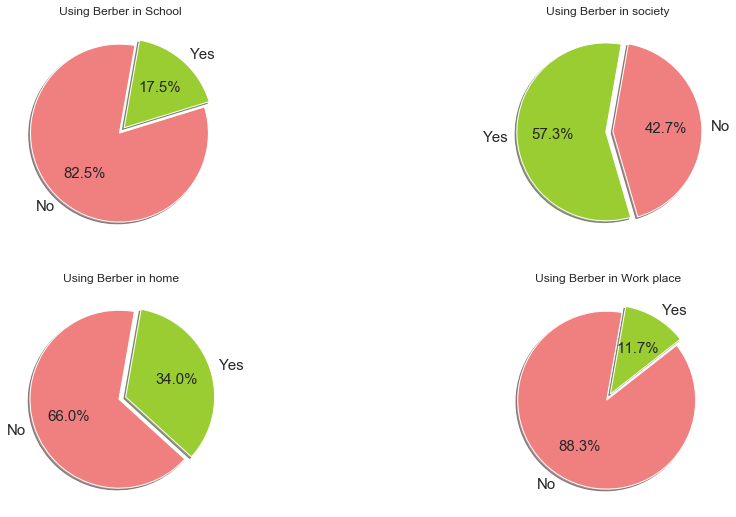

In [25]:
plt.figure(figsize=(16,9))
colors = ['lightcoral','yellowgreen']
explode = (0.02, 0.06)
plt.subplot(2,2,1)
BerberPlace["InSchool"].value_counts().plot.pie(explode=explode,autopct='%1.1f%%', shadow=True,colors=colors, startangle=80,textprops={'fontsize': 15})
plt.title("Using Berber in School")
plt.ylabel('')
plt.subplot(2,2,2)
BerberPlace["InSociety"].value_counts().plot.pie(explode=explode,autopct='%1.1f%%', shadow=True,colors=['yellowgreen','lightcoral'], startangle=80,textprops={'fontsize': 15})
plt.title("Using Berber in society")
plt.ylabel('')
plt.subplot(2,2,3)
BerberPlace["In Home"].value_counts().plot.pie(explode=explode,autopct='%1.1f%%', shadow=True,colors=colors, startangle=80,textprops={'fontsize': 15})
plt.title("Using Berber in home")
plt.ylabel('')
plt.subplot(2,2,4)
BerberPlace["InWorkplace"].value_counts().plot.pie(explode=explode,autopct='%1.1f%%', shadow=True,colors=colors, startangle=80,textprops={'fontsize': 15})
plt.title("Using Berber in Work place")
plt.ylabel('')
plt.show()

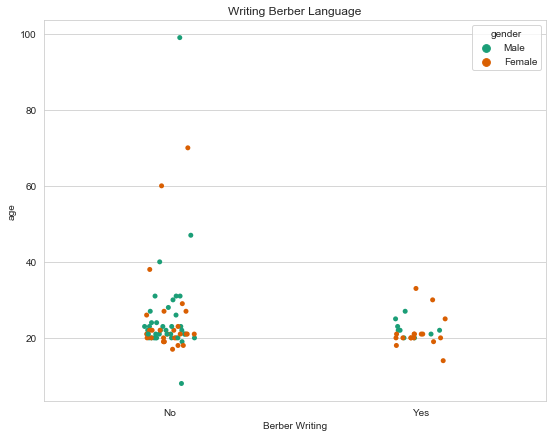

In [26]:
figure=plt.figure(figsize=(9,7))
sns.stripplot(x="Berber Writing",y="age",data=data,hue="gender") 
plt.title("Writing Berber Language")
plt.show()

#### Arabic (Darija) Language :

In [27]:
values=[[],[],[],[],[]]
school,home,society,workplace=values[0],values[1],values[2],values[3]
Places=["school/university","society(public places)","home(family)","work place"]

for i in range(len(data["Where do you speak Arabic(Darija)?"])):
    for j in range(len(Places)):
        if Places[j] in str(data["Where do you speak Arabic(Darija)?"][i]):
            values[j].append("Yes")
        else : 
            values[j].append("No")        

ArabicPlace=pd.DataFrame({'InSchool': school, 
        'InSociety':society, 
        'InWorkplace':workplace,
        'In Home'   :home
        } ) 
ArabicPlace=pd.concat([ArabicPlace,data[["gender","age"]]],axis=1,join="inner") 

In [28]:
ArabicPlace.sample(5)

,InSchool,InSociety,InWorkplace,In Home,gender,age
23,No,No,Yes,No,Male,20
49,Yes,Yes,No,Yes,Male,20
79,Yes,Yes,Yes,Yes,Female,21
90,Yes,Yes,Yes,Yes,Female,22
44,Yes,No,No,Yes,Male,28


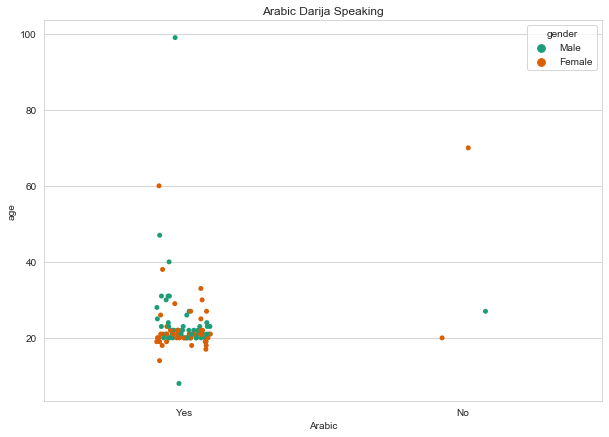

In [29]:
plt.figure(figsize=(10,7))
sns.stripplot(x="Arabic",y="age",hue='gender',data=df1)
plt.title("Arabic Darija Speaking")
plt.show()

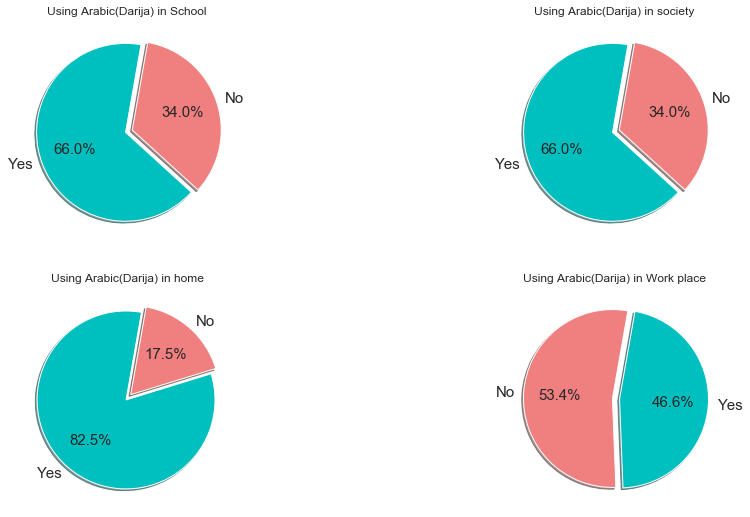

In [30]:
plt.figure(figsize=(16,9))
colors = ['c','lightcoral']
explode = (0.02, 0.06)
plt.subplot(2,2,1)
ArabicPlace["InSchool"].value_counts().plot.pie(explode=explode,autopct='%1.1f%%', shadow=True,colors=colors, startangle=80,textprops={'fontsize': 15})
plt.title("Using Arabic(Darija) in School")
plt.ylabel('')
plt.subplot(2,2,2)
ArabicPlace["InSociety"].value_counts().plot.pie(explode=explode,autopct='%1.1f%%', shadow=True,colors=colors, startangle=80,textprops={'fontsize': 15})
plt.title("Using Arabic(Darija) in society")
plt.ylabel('')
plt.subplot(2,2,3)
ArabicPlace["In Home"].value_counts().plot.pie(explode=explode,autopct='%1.1f%%', shadow=True,colors=colors, startangle=80,textprops={'fontsize': 15})
plt.title("Using Arabic(Darija) in home")
plt.ylabel('')
plt.subplot(2,2,4)
ArabicPlace["InWorkplace"].value_counts().plot.pie(explode=explode,autopct='%1.1f%%', shadow=True,colors=['lightcoral','c'], startangle=80,textprops={'fontsize': 15})
plt.title("Using Arabic(Darija) in Work place")
plt.ylabel('')
plt.show()

#### English Language :

In [31]:
values=[[],[],[],[],[]]
school,home,society,workplace=values[0],values[1],values[2],values[3]
Places=["school/university","society(public places)","home(family)","work place"]

for i in range(len(data["Where do you speak English?"])):
    for j in range(len(Places)):
        if Places[j] in str(data["Where do you speak English?"][i]):
            values[j].append("Yes")
        else : 
            values[j].append("No")        

EnglishPlace=pd.DataFrame({'InSchool': school, 
        'InSociety':society, 
        'InWorkplace':workplace,
        'In Home'   :home
        } ) 
EnglishPlace=pd.concat([EnglishPlace,data[["gender","age"]]],axis=1,join="inner") 

In [32]:
EnglishPlace.sample(5)

,InSchool,InSociety,InWorkplace,In Home,gender,age
1,No,No,Yes,No,Male,21
74,Yes,No,No,No,Male,20
59,Yes,No,No,No,Female,19
97,Yes,No,Yes,No,Female,25
77,Yes,No,No,Yes,Male,21


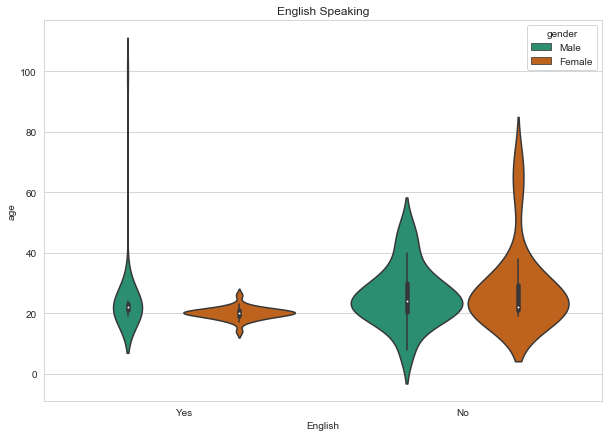

In [33]:
plt.figure(figsize=(10,7))
sns.violinplot(x="English",y="age",hue='gender',data=df1)
plt.title("English Speaking")
plt.show()

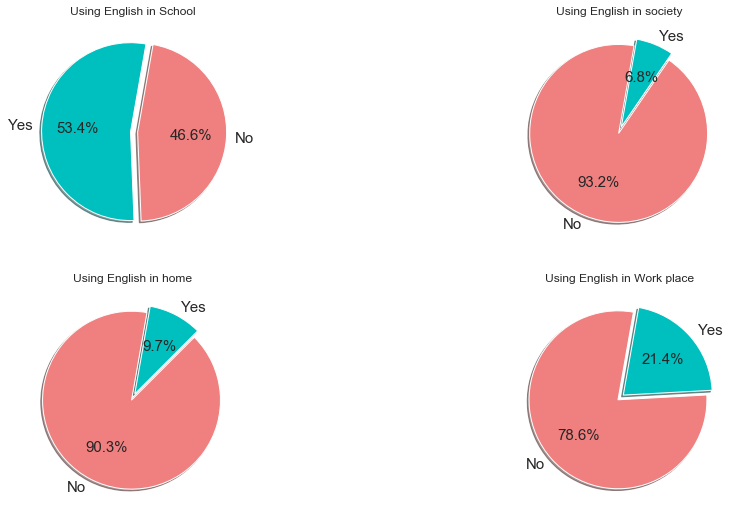

In [34]:
plt.figure(figsize=(16,9))
colors = ['lightcoral','c']
explode = (0.02, 0.06)
plt.subplot(2,2,1)
EnglishPlace["InSchool"].value_counts().plot.pie(explode=explode,autopct='%1.1f%%', shadow=True,colors=['c','lightcoral'], startangle=80,textprops={'fontsize': 15})
plt.title("Using English in School")
plt.ylabel('')
plt.subplot(2,2,2)
EnglishPlace["InSociety"].value_counts().plot.pie(explode=explode,autopct='%1.1f%%', shadow=True,colors=colors, startangle=80,textprops={'fontsize': 15})
plt.title("Using English in society")
plt.ylabel('')
plt.subplot(2,2,3)
EnglishPlace["In Home"].value_counts().plot.pie(explode=explode,autopct='%1.1f%%', shadow=True,colors=colors, startangle=80,textprops={'fontsize': 15})
plt.title("Using English in home")
plt.ylabel('')
plt.subplot(2,2,4)
EnglishPlace["InWorkplace"].value_counts().plot.pie(explode=explode,autopct='%1.1f%%', shadow=True,colors=colors, startangle=80,textprops={'fontsize': 15})
plt.title("Using English in Work place")
plt.ylabel('')
plt.show()

#### French Language :

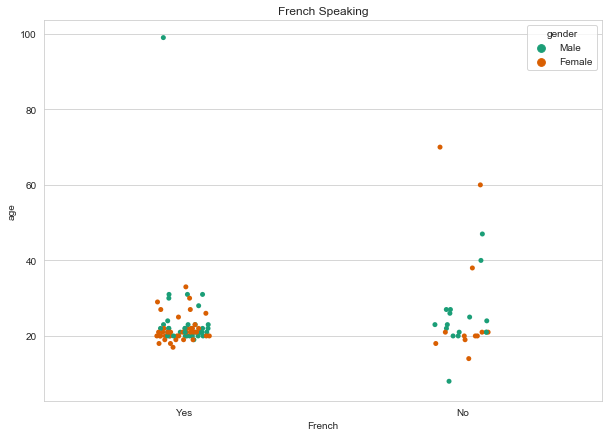

In [37]:
plt.figure(figsize=(10,7))
sns.stripplot(x="French",y="age",hue='gender',data=df1)
plt.title("French Speaking")
plt.show()

In [39]:
values=[[],[],[],[],[]]
school,home,society,workplace=values[0],values[1],values[2],values[3]
Places=["school/university","society(public places)","home(family)","work place"]

for i in range(len(data["Where do you speak French?"])):
    for j in range(len(Places)):
        if Places[j] in str(data["Where do you speak French?"][i]):
            values[j].append("Yes")
        else : 
            values[j].append("No")        

FrenchPlace=pd.DataFrame({'InSchool': school, 
        'InSociety':society, 
        'InWorkplace':workplace,
        'In Home'   :home
        } ) 
FrenchPlace=pd.concat([FrenchPlace,data[["gender","age"]]],axis=1,join="inner") 
FrenchPlace.sample(5)

,InSchool,InSociety,InWorkplace,In Home,gender,age
53,Yes,No,No,No,Female,20
52,No,No,No,No,Male,21
92,No,No,No,No,Female,20
95,Yes,No,No,No,Female,21
7,Yes,No,Yes,No,Male,22


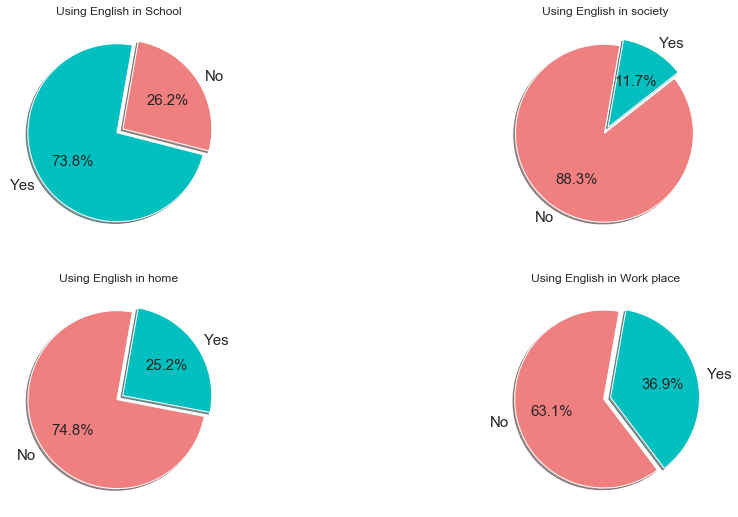

In [40]:
plt.figure(figsize=(16,9))
colors = ['lightcoral','c']
explode = (0.02, 0.06)
plt.subplot(2,2,1)
FrenchPlace["InSchool"].value_counts().plot.pie(explode=explode,autopct='%1.1f%%', shadow=True,colors=['c','lightcoral'], startangle=80,textprops={'fontsize': 15})
plt.title("Using English in School")
plt.ylabel('')
plt.subplot(2,2,2)
FrenchPlace["InSociety"].value_counts().plot.pie(explode=explode,autopct='%1.1f%%', shadow=True,colors=colors, startangle=80,textprops={'fontsize': 15})
plt.title("Using English in society")
plt.ylabel('')
plt.subplot(2,2,3)
FrenchPlace["In Home"].value_counts().plot.pie(explode=explode,autopct='%1.1f%%', shadow=True,colors=colors, startangle=80,textprops={'fontsize': 15})
plt.title("Using English in home")
plt.ylabel('')
plt.subplot(2,2,4)
FrenchPlace["InWorkplace"].value_counts().plot.pie(explode=explode,autopct='%1.1f%%', shadow=True,colors=colors, startangle=80,textprops={'fontsize': 15})
plt.title("Using English in Work place")
plt.ylabel('')
plt.show()